In [1]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [18]:
##### Read Data
data=pd.read_csv("Data.csv")

In [19]:
##### Visualize your Data
print ("Let's explore our question set",data["question"])
print ("Length of training set",len(data["question"]))
print ("Unique answers are",set(data["answer"])," and number of unique answers are ", len(set(data["answer"])))

Let's explore our question set 0                 how are you ?
1             how is your day ?
2                      good day
3       how is it going today ?
4               have a nice day
5                 see you later
6               have a nice day
7              talk to you soon
8            make me a sandwich
9     can you make a sandwich ?
10    having a sandwich today ?
11            what's for lunch?
Name: question, dtype: object
Length of training set 12
Unique answers are {'greeting', 'goodbye', 'sandwitch'}  and number of unique answers are  3


In [20]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

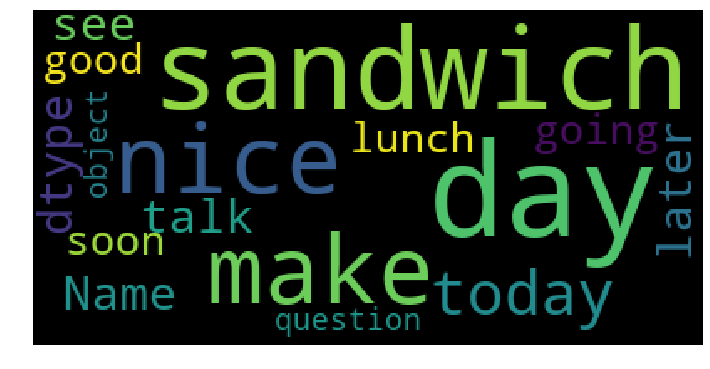

In [21]:
show_wordcloud(data['question'])

In [22]:
##### Let's change the list of questions into list of words for better visualization
word_list=[]
list_question=list(data["question"])
for sentence in list_question:
	words_sentence=sentence.split()
	for words in words_sentence:
		word_list.append(words)


word_list=[word for sentence in list(data["question"]) for word in sentence.split()]
print(word_list)

['how', 'are', 'you', '?', 'how', 'is', 'your', 'day', '?', 'good', 'day', 'how', 'is', 'it', 'going', 'today', '?', 'have', 'a', 'nice', 'day', 'see', 'you', 'later', 'have', 'a', 'nice', 'day', 'talk', 'to', 'you', 'soon', 'make', 'me', 'a', 'sandwich', 'can', 'you', 'make', 'a', 'sandwich', '?', 'having', 'a', 'sandwich', 'today', '?', "what's", 'for', 'lunch?']


In [24]:
##### Now let's find the frequency of each word and the most common words in the corpus
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))


Counter({'?': 5, 'a': 5, 'you': 4, 'day': 4, 'sandwich': 3, 'how': 3, 'today': 2, 'make': 2, 'have': 2, 'nice': 2, 'is': 2, "what's": 1, 'having': 1, 'for': 1, 'see': 1, 'to': 1, 'going': 1, 'are': 1, 'good': 1, 'lunch?': 1, 'your': 1, 'can': 1, 'talk': 1, 'it': 1, 'me': 1, 'soon': 1, 'later': 1})
[('?', 5), ('a', 5), ('you', 4), ('day', 4), ('sandwich', 3)]


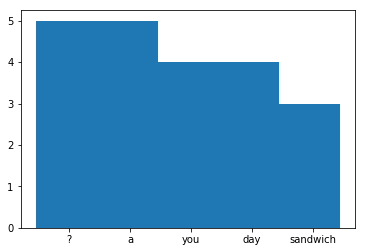

In [26]:
import numpy as np

labels,values = zip(*frequency.items())
labels=[]
values=[]
for T in frequency.most_common(5):
    labels.append(T[0])
    values.append(T[1])

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.05, labels)
plt.show()

In [11]:
##### Now let's pre process/ clean our data

In [13]:
### Remove Punctuations and change words to lower case
def remove_punctuations(text):    
    words=[word.lower() for word in text.split()] 
    print "words after step 1",words
    words=[w for word in words for w in re.sub(r'[^\w\s]',' ',word).split()]    
    return words

data["question_punctuation_removed"]=data["question"].apply(remove_punctuations)
print (data["question_punctuation_removed"])

0                   [how, are, you]
1              [how, is, your, day]
2                       [good, day]
3       [how, is, it, going, today]
4              [have, a, nice, day]
5                 [see, you, later]
6              [have, a, nice, day]
7             [talk, to, you, soon]
8           [make, me, a, sandwich]
9     [can, you, make, a, sandwich]
10     [having, a, sandwich, today]
11            [what, s, for, lunch]
Name: question_punctuation_removed, dtype: object


In [16]:
### Remove StopWords
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print (stop)
def remove_stopwords(text):
	modified_word_list=[word for word in text if word not in stop]
	return modified_word_list

data["question_stopword_removed"]=data["question_punctuation_removed"].apply(remove_stopwords)
print (data["question_stopword_removed"])

{'been', 'isn', 'whom', 'of', 'had', 'are', 'ours', 'during', 're', 'under', 'where', 'they', 'there', 'few', 'doesn', 'its', 'i', 'on', 'you', 'but', 'some', 'can', 'we', 'weren', 'again', 'below', 'a', 'do', 'the', 'by', 'about', 'both', 'all', 'herself', 'such', 'is', 'her', 'as', 'very', 'for', 'so', 'too', 'yourself', 'than', 'didn', 'she', 'down', 'aren', 'if', 'an', 'this', 'will', 'or', 'these', 'not', 'me', 'into', 'ma', 'against', 'same', 'through', 'himself', 'has', 'before', 'y', 'shouldn', 'while', 'does', 'wouldn', 'own', 'which', 'mightn', 'to', 'myself', 'how', 'having', 't', 'who', 'themselves', 'mustn', 'haven', 'until', 'was', 'wasn', 'what', 'and', 'am', 'above', 'their', 'don', 'm', 'won', 'further', 'any', 'no', 'those', 'be', 'nor', 'did', 'needn', 'at', 'in', 'him', 'now', 'theirs', 'ain', 'my', 'because', 'them', 'after', 'more', 'between', 'with', 'o', 'itself', 'over', 'it', 'doing', 's', 'shan', 'each', 'up', 'hadn', 'out', 'most', 'then', 'when', 'other', '

In [18]:
### Stemming of Words
from nltk.stem.porter import PorterStemmer
st=PorterStemmer()
def Stemming(text):
	stemmed_words=[st.stem(word) for word in text] 
	return stemmed_words

data["question_stemmed"]=data["question_stopword_removed"].apply(Stemming)
print (data["question_stemmed"])

0                    []
1                 [day]
2           [good, day]
3           [go, today]
4           [nice, day]
5          [see, later]
6           [nice, day]
7          [talk, soon]
8      [make, sandwich]
9      [make, sandwich]
10    [sandwich, today]
11              [lunch]
Name: question_stemmed, dtype: object


In [23]:
### Recreating the sentence
def Recreate(text):
	word=" ".join(text)
	return word

data["modified_sentence"]=data["question_stemmed"].apply(Recreate)
print (data["modified_sentence"])	

0                   
1                day
2           good day
3           go today
4           nice day
5          see later
6           nice day
7          talk soon
8      make sandwich
9      make sandwich
10    sandwich today
11             lunch
Name: modified_sentence, dtype: object


In [29]:
def Cleaning(text):
    text_punctuation_removed=remove_punctuations(text)
    text_stopword_removed=remove_stopwords(text_punctuation_removed)
    text_stemmed=Stemming(text_stopword_removed)
    final_text=Recreate(text_stemmed)
    print (final_text)
    return final_text
    

In [25]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["modified_sentence"]).toarray()
print(X)
print(vectorizer.get_feature_names())


[[0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0]]
['day', 'go', 'good', 'later', 'lunch', 'make', 'nice', 'sandwich', 'see', 'soon', 'talk', 'today']


In [26]:
###### Extra Tf-idf transformation
#from sklearn.feature_extraction.text import TfidfTransformer
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(data["modified_sentence"])
#X_train_tfidf.shape

In [30]:
### Let's create our first Classification model
Y=data["answer"]
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression().fit(X, Y)

question="What a good day"
P=vectorizer.transform([Cleaning(question)])
predict1=clf1.predict(P)
print (predict1)

What good day
['greeting']


In [32]:
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(X, Y)


P=vectorizer.transform([Cleaning(question)])
predict2=clf2.predict(P)
print (predict2)

What good day
['greeting']


In [33]:
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier().fit(X, Y)

P=vectorizer.transform([Cleaning(question)])
predict3=clf3.predict(P)
print (predict3)

What good day
['greeting']


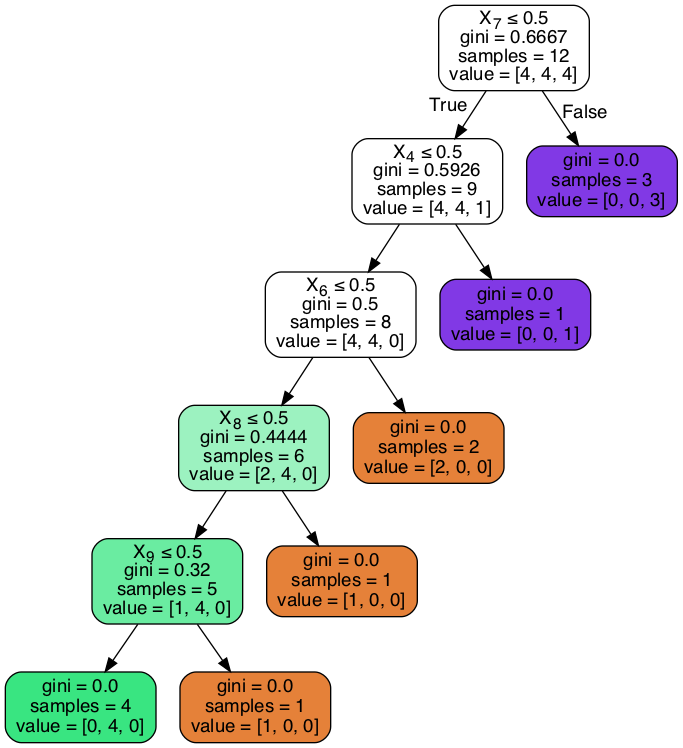

In [94]:
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print (graph)
graph.write_pdf("iris.pdf")
from IPython.display import Image

Image(graph.create_png())

In [37]:
final_predict=[]
final_predict=list(predict1)+list(predict2)+list(predict3)
final_predict = Counter(final_predict)
print (final_predict.most_common(1)[0][0])

greeting


In [87]:
def Predict(text):
    P=vectorizer.transform([Cleaning(text)])
    predict1=clf1.predict(P)
    print (predict1)

    predict2=clf2.predict(P)
    print (predict2)
    
    predict3=clf3.predict(P)
    print (predict3)
    
    final_predict=[]
    final_predict=list(predict1)+list(predict2)+list(predict3)
    final_predict = Counter(final_predict)
    print (final_predict.most_common(1)[0][0])
    
    return final_predict.most_common(1)[0][0]
    
    
    
    

In [40]:
##### Finding the most similar sentence
from sklearn.metrics.pairwise import linear_kernel

cosine_similarities = linear_kernel(X[1], X).flatten()
print (cosine_similarities)
index=[i+1 for i in range(len(X))]
print (index)
print (sorted(zip(cosine_similarities, index), reverse=True)[:3])

[ 0.  1.  1.  0.  1.  0.  1.  0.  0.  0.  0.  0.]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[(1.0, 7), (1.0, 5), (1.0, 3)]


/Users/divalicious/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [91]:
### Checking Accuracy of the Classifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

#X_train, X_test, Y_train, Y_test = train_test_split(data["question"], data["answer"], random_state=0)

X_test=["have a nice day","what's for lunch","how are you"]
Y_test=["greeting","sandwitch","greeting"]

Y_pred=[]
for i in X_test:
    prediction=Predict(i)
    print(prediction)
    Y_pred.append(prediction)
print (Y_pred)
print (Y_test)
cnf_matrix = confusion_matrix(Y_test,Y_pred)
print (cnf_matrix)

nice day
['goodbye']
['goodbye']
['goodbye']
goodbye
goodbye
lunch
['sandwitch']
['sandwitch']
['sandwitch']
sandwitch
sandwitch

['greeting']
['goodbye']
['greeting']
greeting
greeting
['goodbye', 'sandwitch', 'greeting']
['goodbye', 'greeting', 'sandwitch']
[[1 0 0]
 [0 0 1]
 [0 1 0]]


[[1 0 0]
 [0 0 1]
 [0 1 0]]


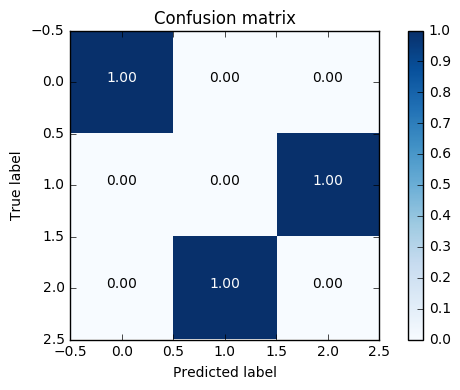

In [92]:
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')